<a href="https://colab.research.google.com/github/glombardo/Decoding-Consumer-Profiles-via-Big-Five-Traits/blob/main/Decoding_Consumer_Profiles_via_Big_Five_Traits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data-driven explorayory project aimed at uncovering nuanced consumer segments by analyzing Big Five personality traits alongside demographic variables such as age, gender, and year. Leverages hierarchical clustering techniques to inform targeted marketing strategies and enhance consumer engagement.

Objectives:
- Calculate Big Five Personality Scores: Utilize standardized formulas from the International Personality Item Pool (IPIP) to derive scores for Openness, Conscientiousness, Extraversion, Agreeableness, and Neuroticism.
- Hierarchical Clustering Analysis: Integrate personality scores with demographic data to perform hierarchical clustering, identifying distinct consumer segments.
- Dendrogram Construction and Evaluation: Generate dendrograms to visualize cluster formations and determine the most representative clustering structure.
- Optimal Cluster Determination: Employ statistical measures such as the silhouette coefficient and cophenetic correlation to ascertain the ideal number of clusters.
- Cluster Profiling: Analyze and interpret the characteristics of each cluster, providing insights into consumer behaviors and preferences.
- Temporal Analysis for 2025: Replicate the clustering process using data exclusively from the year 2025 to identify shifts in consumer segments and emerging trends.

## Import tools and parse data

In [1]:
import pandas as pd # data wrangling
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # graphs
from sklearn.cluster import KMeans # K-Means clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # hierarchical clustering
from sklearn.cluster import AgglomerativeClustering # Agglomerative hierarchical clustering
from sklearn.preprocessing import StandardScaler # scaling data for analysis
from sklearn.pipeline import make_pipeline # creating data analysis pipelines that are easier to process
from sklearn.manifold import TSNE # T-SNE methods
from yellowbrick.cluster import KElbowVisualizer # Visualization

csv_file_path = 'personality_data_2025.csv'  # Update the path
df = pd.read_csv(csv_file_path, skiprows=[1, 2])
#df

## Big 5 Personality Score Calculation and Data Prep

In [2]:
df['E'] = (
    20
    + df['Q1'] - df['Q9']  + df['Q14'] - df['Q19']
    + df['Q24'] - df['Q29'] + df['Q34'] - df['Q39']
    + df['Q45'] - df['Q50']
)
df['A'] = (
    14
    - df['Q4']  + df['Q10']  - df['Q15']
    + df['Q20'] - df['Q25'] + df['Q30'] - df['Q35']
    + df['Q40'] - df['Q46'] + df['Q51']
)
df['C'] = (
    14
    + df['Q6']  - df['Q11']  + df['Q16'] - df['Q21']
    + df['Q26'] - df['Q31'] + df['Q36'] - df['Q41']
    + df['Q47'] - df['Q52']
)
df['N'] = (
    38
    - df['Q7']  + df['Q12']  - df['Q17'] + df['Q22']
    - df['Q27'] + df['Q32'] - df['Q37'] + df['Q42']
    - df['Q48'] + df['Q53']
)
df['O'] = (
    8
    + df['Q8']  - df['Q13'] + df['Q18'] - df['Q23']
    + df['Q28'] - df['Q33'] + df['Q38'] - df['Q43']
    + df['Q49'] - df['Q54']
)

new_cols = ['E', 'A', 'C', 'N', 'O'] + [col for col in df.columns if col not in ['E', 'A', 'C', 'N', 'O']]
df = df[new_cols]

#df.head()

data_subset = df[['E', 'A', 'C', 'N', 'O', 'Q127', 'Q129', 'Year']]
data_subset['Q127'] = data_subset['Q127'].astype(str).str[:2]
data_subset['Q127'] = pd.to_numeric(data_subset['Q127'], errors='coerce')
data_subset = data_subset.dropna(inplace=False)
#data_subset.describe()

columns_to_scale = ['E', 'A', 'C', 'N', 'O', 'Q127', 'Year']
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data_subset[columns_to_scale])
scaled_df = pd.DataFrame(scaled_array, columns=columns_to_scale)
scaled_df['Q129'] = data_subset['Q129'].values
data_scaled = scaled_df


<ipython-input-2-a37a76225fc7>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Q127'] = data_subset['Q127'].astype(str).str[:2]
<ipython-input-2-a37a76225fc7>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Q127'] = pd.to_numeric(data_subset['Q127'], errors='coerce')


## Dendograms: The Ward Linkage method seems to provide the best segmentation

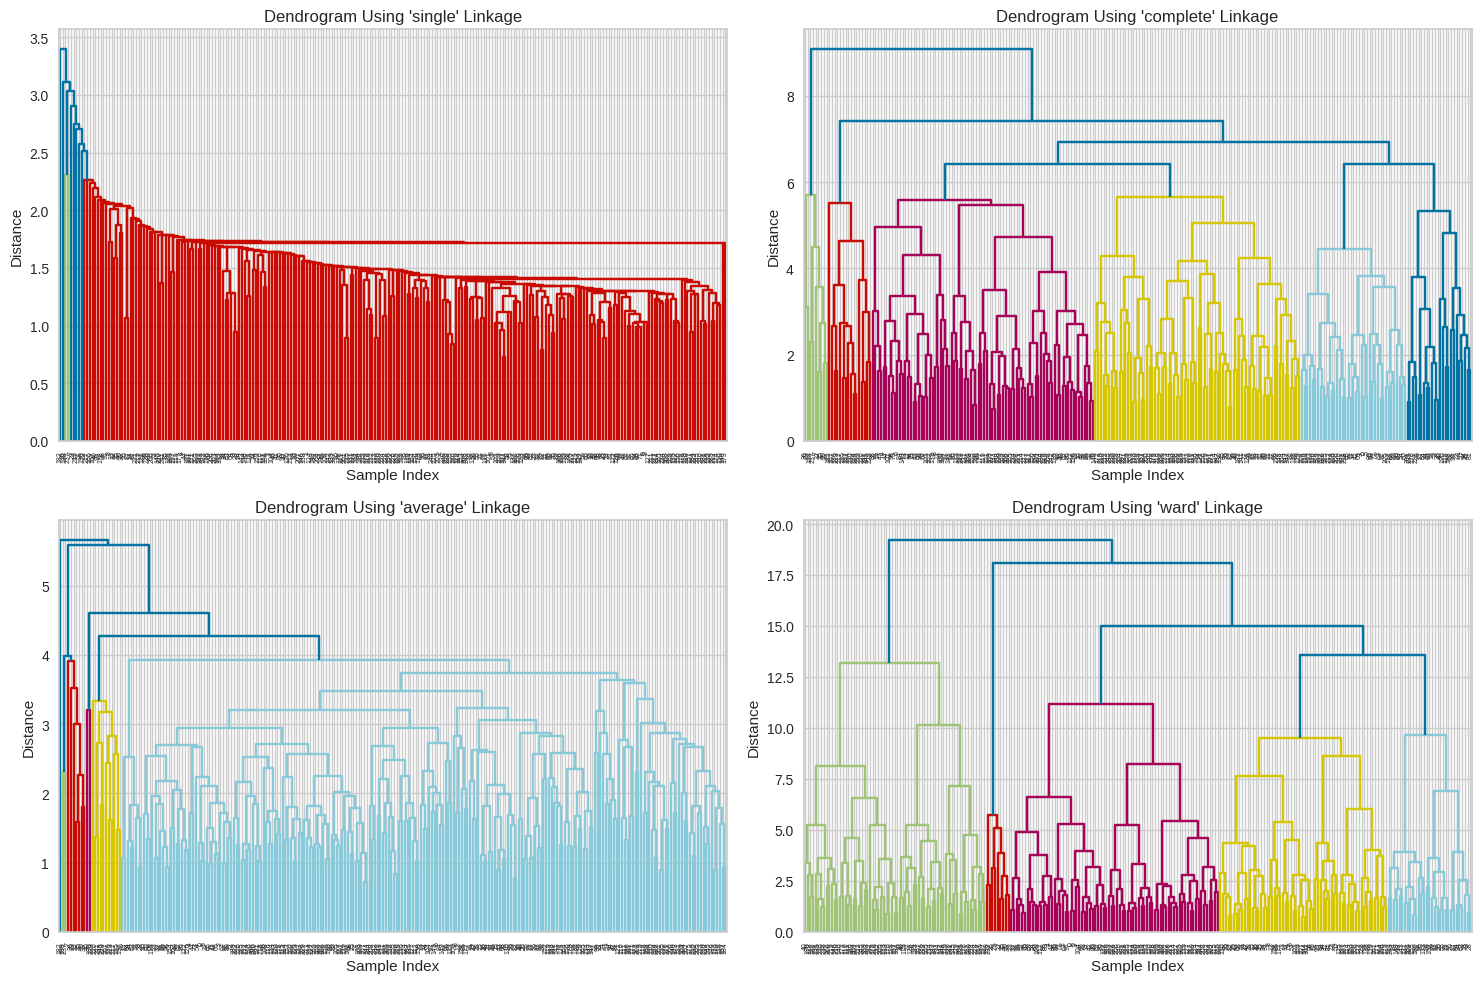

In [3]:
X = data_scaled.values

linkage_methods = ['single', 'complete', 'average', 'ward']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, method in zip(axes.flatten(), linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(X, method=method)

    # Plot dendrogram
    dendrogram(Z, ax=ax)
    ax.set_title(f"Dendrogram Using '{method}' Linkage")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()


## The optimal number of clusters is around 3 (but this can change due to random seeds). The prediction clusters for each observation is shown in the output.

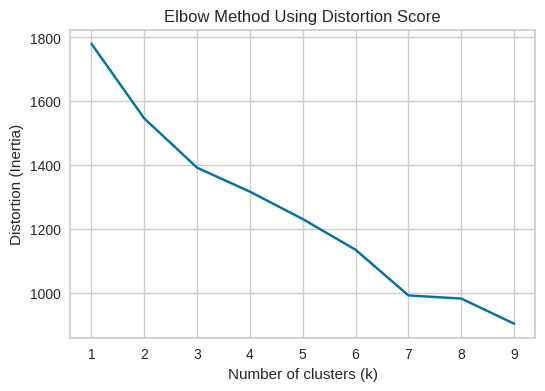

Cluster labels assigned. Distribution:
Cluster
2    83
0    82
1    81
Name: count, dtype: int64


,E,A,C,N,O,Q127,Year,Q129,Cluster
0,0.620450,1.036717,0.344487,-0.171602,1.204501,1.266124,-1.520016,2.0,2
1,-0.335733,-1.038251,0.187554,0.356075,0.942976,-0.668451,-1.520016,2.0,2
2,0.142358,1.225351,1.286086,1.675268,0.419927,-0.474993,-1.520016,1.0,2
3,-0.455256,1.413984,0.972220,0.619913,-0.364646,0.879209,-1.520016,2.0,2
4,1.457109,0.659450,-0.754044,0.619913,0.419927,-0.474993,-1.520016,1.0,2
...,...,...,...,...,...,...,...,...,...
241,2.054723,1.036717,-0.754044,-0.171602,-2.195317,0.685752,1.347499,1.0,1
242,1.457109,1.413984,0.187554,-1.490795,0.158403,-0.861908,1.347499,2.0,1
243,1.098541,1.413984,-0.910977,-1.490795,0.681452,0.298837,1.347499,2.0,1
244,0.979018,1.413984,0.658353,-2.018472,0.681452,-0.668451,1.347499,1.0,1


In [4]:
distortions = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    distortions.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method Using Distortion Score')
plt.show()

optimal_k = 3

final_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_model.fit_predict(X)

data_scaled['Cluster'] = cluster_labels
print("Cluster labels assigned. Distribution:")
print(data_scaled['Cluster'].value_counts())
data_scaled

## Cluster 0 tends toward lower Extroversion and Agreeableness (both means below zero), slightly higher Conscientiousness (mean at +0.25), and notably lower Openness (–0.65). Their Neuroticism is near the mean (about +0.04), and their average age is slightly below the mean (–0.05). In contrast, Cluster 1 shows higher Extroversion (+0.63), moderately higher Agreeableness (+0.32), but lower Conscientiousness (–0.55), with Neuroticism a bit above average (+0.10) and Openness also above zero (+0.33). Their age mean is somewhat more negative (–0.33). Finally, Cluster 2 sits in the middle on Extroversion (+0.18), moderately positive on both Agreeableness (+0.18) and Conscientiousness (+0.30), a bit below zero on Neuroticism (–0.14), and modestly higher on Openness (+0.29). This group stands out for having the highest relative age mean (+0.38) among the three.

In [5]:
import pandas as pd

columns_of_interest = ['E', 'A', 'C', 'N', 'O', 'Q127']

cluster_stats = (
    data_scaled
    .groupby('Cluster')[columns_of_interest]
    .agg(['mean', 'std'])  # You can add more metrics if desired
)

cluster_stats.columns = ['_'.join(col).strip() for col in cluster_stats.columns.values]
cluster_stats


,E_mean,E_std,A_mean,A_std,C_mean,C_std,N_mean,N_std,O_mean,O_std,Q127_mean,Q127_std
Cluster,,,,,,,,,,,,
0,-0.907110,0.760122,-0.619577,1.055076,-0.042104,0.913804,-0.039683,0.969848,-0.578331,1.092010,-0.057408,0.832214
1,0.710461,0.660770,0.428898,0.731183,-0.182498,1.046082,0.134581,1.063123,0.284322,0.858572,-0.348410,0.464057
2,0.202840,0.800124,0.193548,0.880510,0.219697,1.011938,-0.092133,0.969611,0.293892,0.775335,0.396731,1.350278


## Same analysis for 2025 only: Cluster 0 is generally lower on Extraversion and Agreeableness, a bit higher on Conscientiousness, and a bit more Neurotic than average, with Openness close to zero and a slightly younger age profile. Cluster 1 stands out with moderate Extraversion, slightly positive Agreeableness, but notably lower Conscientiousness and much lower Neuroticism, showing a slight boost in Openness and skewing younger on age as well. Cluster 2 is fairly high on Extraversion, Agreeableness, and Conscientiousness, but also a bit higher on Neuroticism than average, paired with moderate Openness and a relatively older age. Finally, Cluster 3 is extremely extraverted and quite agreeable but very low on Conscientiousness, somewhat higher on Neuroticism, strikingly low on Openness, and leans a bit older.

In [6]:
#Q129 -> "what is your gender?" "1, 2 or null"
#Q127 -> "what is your age?"
data_subset_2025 = df[['E', 'A', 'C', 'N', 'O', 'Q127', 'Q129', 'Year']]
data_subset_2025['Q127'] = data_subset_2025['Q127'].astype(str).str[:2]
data_subset_2025['Q127'] = pd.to_numeric(data_subset_2025['Q127'], errors='coerce')
data_subset_2025 = data_subset_2025.dropna(inplace=False)
data_subset_2025 = data_subset_2025[data_subset_2025['Year'] == 2025]
data_subset_2025.describe()

<ipython-input-6-d81e1f3efe54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset_2025['Q127'] = data_subset_2025['Q127'].astype(str).str[:2]
<ipython-input-6-d81e1f3efe54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset_2025['Q127'] = pd.to_numeric(data_subset_2025['Q127'], errors='coerce')


,E,A,C,N,O,Q127,Q129,Year
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,23.936170,21.936170,18.340426,36.148936,14.787234,24.872340,1.553191,2025.0
std,7.437871,5.806309,6.090893,4.091235,3.950433,4.230413,0.544079,0.0
min,11.000000,9.000000,3.000000,28.000000,0.000000,21.000000,1.000000,2025.0
25%,19.000000,18.000000,14.000000,33.500000,13.000000,23.000000,1.000000,2025.0
50%,24.000000,23.000000,18.000000,36.000000,15.000000,23.000000,2.000000,2025.0
75%,29.000000,27.000000,23.000000,38.500000,18.000000,25.500000,2.000000,2025.0
max,40.000000,30.000000,30.000000,45.000000,21.000000,47.000000,3.000000,2025.0


In [7]:
columns_to_scale_2025 = ['E', 'A', 'C', 'N', 'O', 'Q127', 'Year']
scaler = StandardScaler()
scaled_array_2025 = scaler.fit_transform(data_subset_2025[columns_to_scale_2025])
scaled_df_2025 = pd.DataFrame(scaled_array_2025, columns=columns_to_scale_2025)
scaled_df_2025['Q129'] = data_subset_2025['Q129'].values
data_scaled_2025 = scaled_df_2025

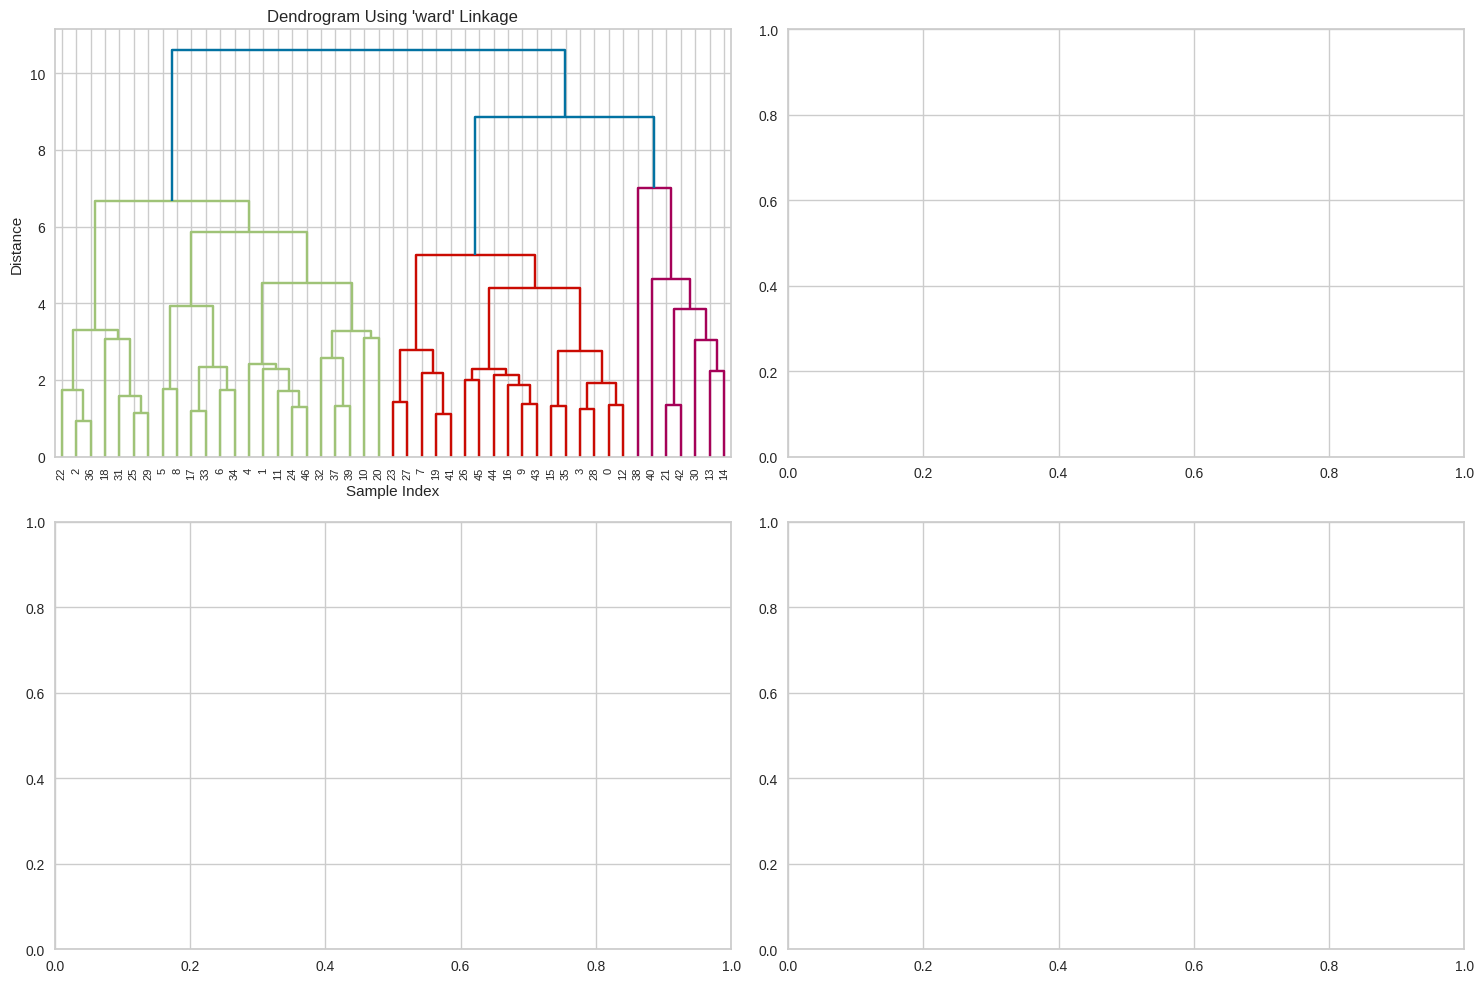

In [8]:
X = data_scaled_2025.values

linkage_methods = ['ward']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, method in zip(axes.flatten(), linkage_methods):
    # Perform hierarchical clustering
    Z = linkage(X, method=method)

    # Plot dendrogram
    dendrogram(Z, ax=ax)
    ax.set_title(f"Dendrogram Using '{method}' Linkage")
    ax.set_xlabel("Sample Index")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.show()


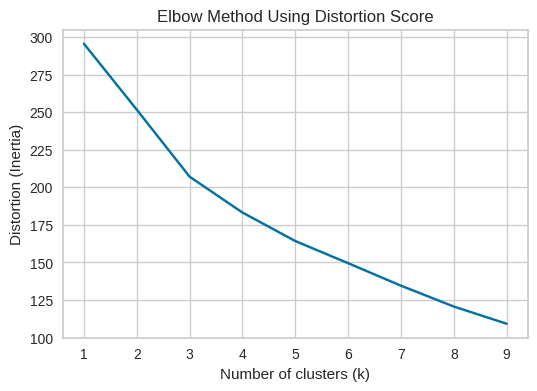

Cluster labels assigned. Distribution:
Cluster
2    83
0    82
1    81
Name: count, dtype: int64


,E,A,C,N,O,Q127,Year,Q129,Cluster
0,0.552277,0.185200,1.271141,0.210270,-0.713179,-0.447375,0.0,2.0,2
1,-1.078530,-2.252037,-0.720313,0.210270,1.077935,0.030503,0.0,1.0,1
2,-0.670828,-0.162976,-0.388404,1.939742,0.566188,-0.208436,0.0,2.0,0
3,0.824078,1.229731,0.441368,0.210270,0.054441,-0.447375,0.0,2.0,2
4,-1.486232,-1.729772,0.109459,-1.766270,1.333809,-0.447375,0.0,1.0,1
5,-0.534928,-1.903860,1.437095,-0.283865,0.822062,-0.447375,0.0,1.0,0
6,-1.350331,-1.033418,1.934959,0.457338,-0.713179,-0.447375,0.0,2.0,0
7,0.144575,0.185200,1.271141,-0.283865,0.566188,0.986259,0.0,1.0,2
8,0.008675,-2.077949,1.603050,-0.036797,1.333809,0.747320,0.0,2.0,0
9,0.959979,0.881554,-0.388404,-1.272135,-0.457306,-0.447375,0.0,2.0,2


In [9]:
distortions = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    distortions.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method Using Distortion Score')
plt.show()

optimal_k = 4

final_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_model.fit_predict(X)

data_scaled_2025['Cluster'] = cluster_labels
print("Cluster labels assigned. Distribution:")
print(data_scaled['Cluster'].value_counts())
data_scaled_2025

In [10]:
import pandas as pd

columns_of_interest_2025 = ['E', 'A', 'C', 'N', 'O', 'Q127']

cluster_stats_2025 = (
    data_scaled_2025
    .groupby('Cluster')[columns_of_interest_2025]
    .agg(['mean', 'std'])  # You can add more metrics if desired
)


cluster_stats_2025


E                   A                   C                   N  \
             mean       std      mean       std      mean       std      mean   
Cluster                                                                         
0       -0.832210  0.639780 -0.587317  0.724701 -0.035751  1.108919  0.642638   
1       -0.383927  0.739518 -0.936703  0.917526 -0.867828  0.757980 -0.750548   
2        0.798192  0.731366  0.848394  0.439100  0.378148  0.835521 -0.201509   
3        0.008675       NaN  0.011112       NaN  0.441368       NaN  0.704405   

                          O                Q127            
              std      mean       std      mean       std  
Cluster                                                    
0        0.904415 -0.313377  1.147990 -0.074033  0.591545  
1        0.544733  0.594619  0.592451 -0.128790  0.746087  
2        0.983109  0.030072  0.967272 -0.140168  0.659329  
3             NaN -0.969053       NaN  5.287164       NaN